# House Prices - Resolução

## Introdução

Este problema é muito similar ao do preço de casas de Boston, contudo o conjunto de dados é mais completo. Para esse projeto, vamos usar o modelo de regressão linear pois as categorias que estão presentes nos dados são bem complexas. Para ver o significado de cada coluna, veja o arquivo 'data_description.txt'. 

Em particular, as colunas 'GrLivArea' e 'SalePrice' para prever os preços dos imóveis.

## Importando os dados

In [62]:
from pandas import read_csv, DataFrame

# caracteristica = 'OverallQual'
# caracteristica = 'TotalBsmtSF'
caracteristica = 'GrLivArea'


colunas = [caracteristica, 'SalePrice']

df = read_csv('train.csv',
               usecols = colunas)

df

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
...,...,...
1455,1647,175000
1456,2073,210000
1457,2340,266500
1458,1078,142125


## Partição dos dados

In [63]:
X = df[caracteristica].to_numpy()

y = df['SalePrice'].to_numpy()

X

array([1710, 1262, 1786, ..., 2340, 1078, 1256])

In [46]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

## Visualização dos dados

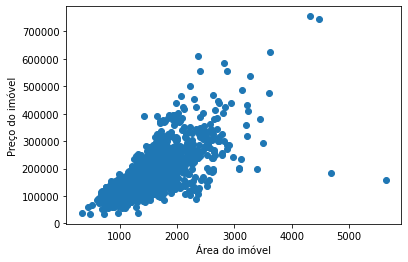

In [64]:
from pylab import plot, scatter, show, xlabel, ylabel, title

scatter(X,y)
xlabel('Área do imóvel')
ylabel('Preço do imóvel')
show()

## Regressão Linear

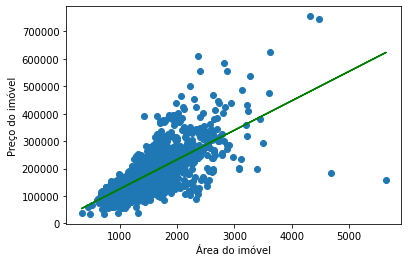

In [65]:
from scipy.stats import linregress

instancia = linregress(X,y)

y0 = instancia.intercept

inclinacao = instancia.slope

y_modelo = inclinacao*X + y0

plot(X, y_modelo, color = 'green')
scatter(X,y)
xlabel('Área do imóvel')
ylabel('Preço do imóvel')
show()

## Implementação do modelo

In [67]:
df2 = read_csv('test.csv',
                usecols = ['Id',caracteristica])

df2

,Id,GrLivArea
0,1461,896
1,1462,1329
2,1463,1629
3,1464,1604
4,1465,1280
...,...,...
1454,2915,1092
1455,2916,1092
1456,2917,1224
1457,2918,970


In [68]:
x = df2[caracteristica].to_numpy()

previsao = inclinacao*x + y0


In [69]:
previsao

array([114557.82748987, 160945.27292207, 193084.38061182, ...,
       149696.58523066, 122485.47405334, 232829.74378814])

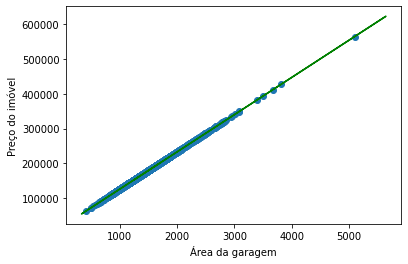

In [71]:
plot(X, y_modelo, color = 'green')
scatter(x,previsao)
xlabel('Área da garagem')
ylabel('Preço do imóvel')
show()

In [74]:
dicionario = {'Id': df2['Id'], 'SalePrice': previsao}

resposta = DataFrame(dicionario)

resposta

,Id,SalePrice
0,1461,114557.827490
1,1462,160945.272922
2,1463,193084.380612
3,1464,190406.121638
4,1465,155695.885333
...,...,...
1454,2915,135555.377847
1455,2916,135555.377847
1456,2917,149696.585231
1457,2918,122485.474053


In [75]:
resposta.to_csv('HousePricesResposta.csv',
                 index = False)